# Final Project
## Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database
## Batch 6

## Heart Disease UCI
Source: https://www.kaggle.com/ronitf/heart-disease-uci#

Attribute Information:
  - age
  - sex
  - chest pain type (4 values)
  - resting blood pressure
  - serum cholestoral in mg/dl
  - fasting blood sugar > 120 mg/dl
  - resting electrocardiographic results (values 0,1,2)
  - maximum heart rate achieved
  - exercise induced angina
  - oldpeak = ST depression induced by exercise relative to rest
  - the slope of the peak exercise ST segment
  - number of major vessels (0-3) colored by flourosopy
  - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [18]:
# Importing References
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

plt.style.use('Solarize_Light2')

In [19]:
# Load data from CSV
data = pd.read_csv('heart.csv')

In [20]:
# Count the rows
len(data)

303

In [21]:
# Show information of DataFrame datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
# Check for null / empty values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the information, data does not have missing value

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


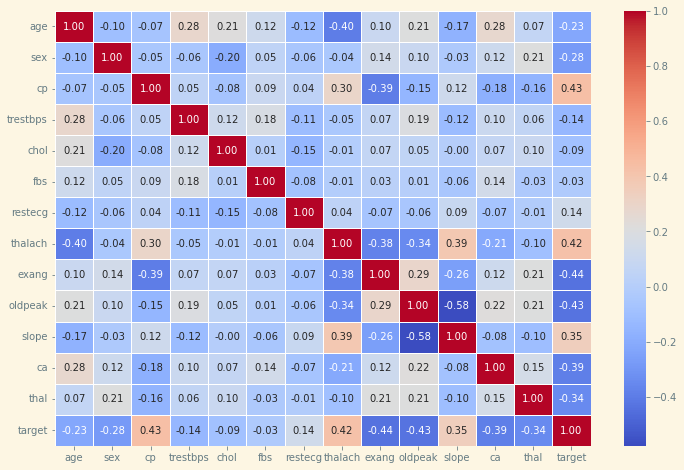

In [25]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, linewidths=1, fmt=".2f", cmap="coolwarm")
plt.show()

## Data Analysis

In [26]:
# Copy and rename dataset
# Rename the columns for better readability
dataset = data.copy()
dataset.rename(
    columns = {
        'age': 'Age',
        'sex': 'Sex',
        'cp': 'Chest pain',
        'trestbps': 'Resting blood pressure',
        'chol': 'Cholesterol',
        'fbs': 'Fasting blood sugar',
        'restecg': 'ECG results',
        'thalach': 'Maximum heart rate',
        'exang': 'Exercise induced angina',
        'oldpeak': 'ST depression',
        'ca': 'Major vessels',
        'thal': 'Thalassemia types',
        'target': 'Heart attack',
        'slope': 'ST slope'
    },
    inplace = True
)
dataset

,Age,Sex,Chest pain,Resting blood pressure,Cholesterol,Fasting blood sugar,ECG results,Maximum heart rate,Exercise induced angina,ST depression,ST slope,Major vessels,Thalassemia types,Heart attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
# Replace values of sex
## 0 to female, 1 to male
dataset['Sex'].replace(
    {
        0: 'Female',
        1: 'Male'
    },
    inplace = True
)

# Replace values of `Heart Attack`
dataset['Heart attack'].replace(
    {
        0:'No',
        1:'Yes'
    },
    inplace = True
)

dataset.head()

,Age,Sex,Chest pain,Resting blood pressure,Cholesterol,Fasting blood sugar,ECG results,Maximum heart rate,Exercise induced angina,ST depression,ST slope,Major vessels,Thalassemia types,Heart attack
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,Yes
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,Yes
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,Yes
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,Yes
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,Yes


#### Heart Attack vs Healthy

Count of person that had heart attack is 165 people, while person that had no heart attack is 138
This translates to 54.46% had heart attack vs 45.54% had no heart attack


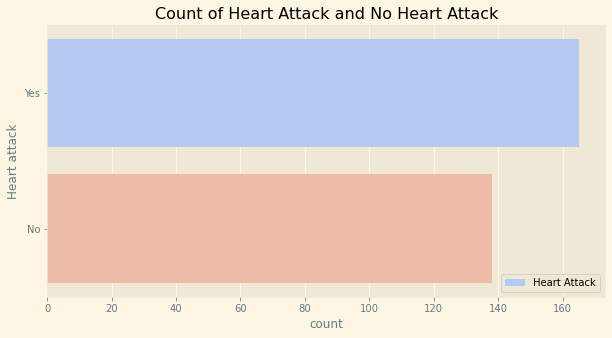

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(
    y=dataset['Heart attack'],
    palette='coolwarm'
)
plt.title('Count of Heart Attack and No Heart Attack')
plt.legend(["Heart Attack", "No Heart Attack"])

print(f"Count of person that had heart attack is {len(dataset.loc[dataset['Heart attack'] == 'Yes'])} people, while person that had no heart attack is {len(dataset.loc[dataset['Heart attack'] == 'No'])}")
print(f"This translates to {(len(dataset.loc[dataset['Heart attack'] == 'Yes'])/len(dataset))*100:0.2f}% had heart attack vs {(len(dataset.loc[dataset['Heart attack'] == 'No'])/len(dataset))*100:0.2f}% had no heart attack")

### Heart attack grouped by sex

Compared to total population,
30.69% of male had heart attack, while 23.76% of female had heart attack
Males that had no heart attack is 37.62%, while female that had no heart attack is 7.92%


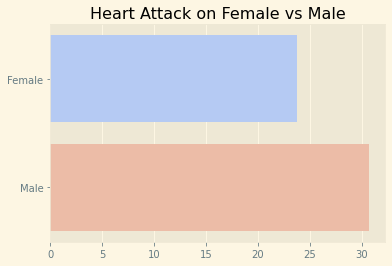

In [62]:
femaleTotal = len(dataset[dataset.Sex=='Female'])
maleTotal = len(dataset[dataset.Sex=='Male'])

femaleSick = len(dataset.loc[(dataset['Heart attack'] == 'Yes') & (dataset['Sex'] == 'Female')])
maleSick = len(dataset.loc[(dataset['Heart attack'] == 'Yes') & (dataset['Sex'] == 'Male')])
femaleOk = len(dataset.loc[(dataset['Heart attack'] == 'No') & (dataset['Sex'] == 'Female')])
maleOk = len(dataset.loc[(dataset['Heart attack'] == 'No') & (dataset['Sex'] == 'Male')])

femaleSickPercentage = femaleSick/len(dataset)*100
maleSickPercentage = maleSick/len(dataset)*100

femaleOkPercentage = femaleOk/len(dataset)*100
maleOkPercentage = maleOk/len(dataset)*100

sns.barplot(
    x=[femaleSickPercentage, maleSickPercentage],
    y=['Female', 'Male'],
    palette='coolwarm'
).set_title('Heart Attack on Sample')

print("Compared to total population,")
print(f"{(maleSickPercentage):0.2f}% of male had heart attack, while {(femaleSickPercentage):0.2f}% of female had heart attack")
print(f"Males that had no heart attack is {(maleOkPercentage):0.2f}%, while female that had no heart attack is {(femaleOkPercentage):0.2f}%")


75.00% of female (72) had heart attack, and only 25.00% (24) had no heart attack.


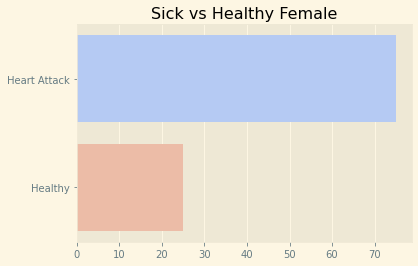

In [60]:
onlyFemaleSick = (femaleSick/(femaleSick+femaleOk))*100
onlyFemaleOk = (femaleOk/(femaleSick+femaleOk))*100

sns.barplot(
    x=[onlyFemaleSick, onlyFemaleOk],
    y=['Heart Attack', 'Healthy'],
    palette='coolwarm'
).set_title('Sick vs Healthy Female')

print(f"{onlyFemaleSick:0.2f}% of female ({femaleSick}) had heart attack, and only {onlyFemaleOk:0.2f}% ({femaleOk}) had no heart attack.")

44.93% of male (93) had heart attack, and 55.07% (114) had no heart attack.


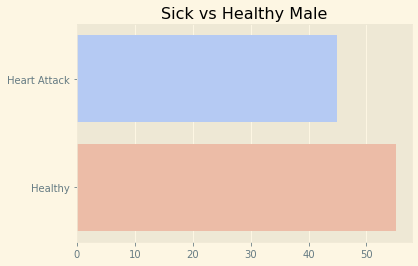

In [59]:
onlyMaleSick = (maleSick/(maleSick+maleOk))*100
onlyMaleOk = (maleOk/(maleSick+maleOk))*100

sns.barplot(
    x=[onlyMaleSick, onlyMaleOk],
    y=['Heart Attack', 'Healthy'],
    palette='coolwarm'
).set_title('Sick vs Healthy Male')

print(f"{onlyMaleSick:0.2f}% of male ({maleSick}) had heart attack, and {onlyMaleOk:0.2f}% ({maleOk}) had no heart attack.")

### Grouping by Age and Sex

In [64]:
s = dataset.groupby(['Age', 'Sex'])['Heart attack']\
    .count().reset_index()\
    .sort_values(by='Age', ascending=False)
s.head(20).style.background_gradient(cmap='coolwarm')

,Age,Sex,Heart attack
72,77,Male,1
71,76,Female,1
70,74,Female,1
69,71,Female,3
68,70,Male,4
67,69,Male,2
66,69,Female,1
65,68,Male,3
64,68,Female,1
63,67,Male,6


### Data Splitting & Modelling

In [33]:
# Split into X and Y
x = data.drop("target", axis=1)
y = data["target"]

In [34]:
# Show X
len(x), x

(303,
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     

In [35]:
# Show Y
len(y), y

(303,
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64)

In [36]:
# Data Train
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=5
)

In [37]:
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

We are scaling the data for better result and accuracy

### Machine Learning Model
After splitting data, we need to test it to find patterns from the dataset `data`.

#### Logistic Regression

In [38]:
logisticRegression = LogisticRegression(solver="liblinear")
logisticRegression.fit(x_train, y_train)
yPrediction = logisticRegression.predict(x_test)
logisticRegressionScore = accuracy_score(yPrediction, y_test)

In [39]:
### Logistic Regression Accuracy
print(f"Machine Learning Accuracy with Logistic Regression: {(logisticRegressionScore)*100:0.2f}%")

Machine Learning Accuracy with Logistic Regression: 88.52%


In [40]:
### Logistic Regression Classification Report
print(classification_report(y_test, logisticRegression.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



Confusion Matrix Recall: 90.32%
Confusion Matrix Precision: 90.32%
Confusion Matrix Accuracy: 88.52%


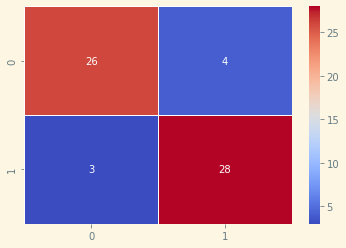

In [41]:
#### Confusion Matrix
sns.heatmap(confusion_matrix(y_test, yPrediction), annot=True, linewidths=1, cmap="coolwarm")

tn, fp, fn, tp = confusion_matrix(y_test, logisticRegression.predict(x_test)).ravel()

# Confusion Matrix Recall
# TP / (TP+FN)
recall = tp / (tp+fn)
print(f"Confusion Matrix Recall: {(recall)*100:0.2f}%")

# Confusion Matrix Precision
# TP / (TP+FP)
precision = tp / (tp+fn)
print(f"Confusion Matrix Precision: {(precision)*100:0.2f}%")

# Confusion Matrix Accuracy
# (TP+TN) / (TP+TN+FP+FN)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(f"Confusion Matrix Accuracy: {(accuracy)*100:0.2f}%")

From top left, clockwise:
  - True Negative
  - False Positive
  - True Positive
  - False Negative

#### K-Nearest Neighbors

Machine Learning Accuracy with K-Nearest Neighbors: 85.25%


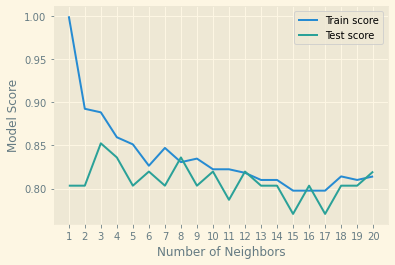

In [42]:
knn_train_scores = []
knn_test_scores = []

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_train_scores.append(knn.score(x_train, y_train))
    knn_test_scores.append(knn.score(x_test, y_test))

plt.plot(neighbors, knn_train_scores, label="Train score")
plt.plot(neighbors, knn_test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Machine Learning Accuracy with K-Nearest Neighbors: {max(knn_test_scores)*100:0.2f}%")
knnScore = max(knn_test_scores)

#### Support Vector Machine

In [43]:
supportVector = SVC(C=15, kernel='linear')
supportVector.fit(x_train, y_train)
yPrediction = supportVector.predict(x_test)
supportVectorAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Support Vector Machine: {supportVectorAccuracy*100:0.2f}%")

Machine Learning Accuracy with Support Vector Machine: 91.80%


Confusion Matrix Recall: 93.55%
Confusion Matrix Precision: 93.55%
Confusion Matrix Accuracy: 91.80%


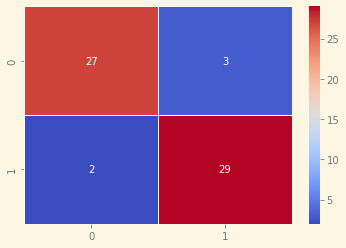

In [44]:
#### Confusion Matrix
sns.heatmap(confusion_matrix(y_test, yPrediction), annot=True, linewidths=1, cmap="coolwarm")

tn, fp, fn, tp = confusion_matrix(y_test, supportVector.predict(x_test)).ravel()

# Confusion Matrix Recall
# TP / (TP+FN)
recall = tp / (tp+fn)
print(f"Confusion Matrix Recall: {(recall)*100:0.2f}%")

# Confusion Matrix Precision
# TP / (TP+FP)
precision = tp / (tp+fn)
print(f"Confusion Matrix Precision: {(precision)*100:0.2f}%")

# Confusion Matrix Accuracy
# (TP+TN) / (TP+TN+FP+FN)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(f"Confusion Matrix Accuracy: {(accuracy)*100:0.2f}%")

#### Naive Bayes

In [45]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)
yPrediction = naiveBayes.predict(x_test)
naiveBayesAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Naive Bayes: {naiveBayesAccuracy*100:0.2f}%")

Machine Learning Accuracy with Naive Bayes: 86.89%


Confusion Matrix Recall: 87.10%
Confusion Matrix Precision: 87.10%
Confusion Matrix Accuracy: 86.89%


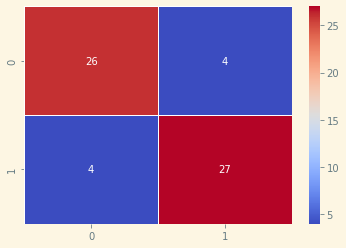

In [46]:
#### Confusion Matrix
sns.heatmap(confusion_matrix(y_test, yPrediction), annot=True, linewidths=1, cmap="coolwarm")

tn, fp, fn, tp = confusion_matrix(y_test, naiveBayes.predict(x_test)).ravel()

# Confusion Matrix Recall
# TP / (TP+FN)
recall = tp / (tp+fn)
print(f"Confusion Matrix Recall: {(recall)*100:0.2f}%")

# Confusion Matrix Precision
# TP / (TP+FP)
precision = tp / (tp+fn)
print(f"Confusion Matrix Precision: {(precision)*100:0.2f}%")

# Confusion Matrix Accuracy
# (TP+TN) / (TP+TN+FP+FN)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(f"Confusion Matrix Accuracy: {(accuracy)*100:0.2f}%")

#### Random Forest

In [47]:
randomForest = RandomForestClassifier(n_estimators=50, random_state=5)
randomForest.fit(x_train, y_train)
yPrediction = randomForest.predict(x_test)
randomForestAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Random Forest: {randomForestAccuracy*100:0.2f}%")

Machine Learning Accuracy with Random Forest: 90.16%


Confusion Matrix Recall: 93.55%
Confusion Matrix Precision: 93.55%
Confusion Matrix Accuracy: 90.16%


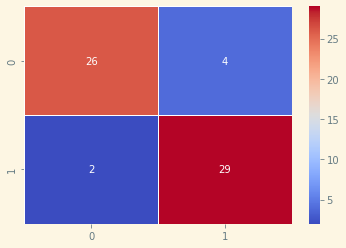

In [48]:
#### Confusion Matrix
sns.heatmap(confusion_matrix(y_test, yPrediction), annot=True, linewidths=1, cmap="coolwarm")

tn, fp, fn, tp = confusion_matrix(y_test, randomForest.predict(x_test)).ravel()

# Confusion Matrix Recall
# TP / (TP+FN)
recall = tp / (tp+fn)
print(f"Confusion Matrix Recall: {(recall)*100:0.2f}%")

# Confusion Matrix Precision
# TP / (TP+FP)
precision = tp / (tp+fn)
print(f"Confusion Matrix Precision: {(precision)*100:0.2f}%")

# Confusion Matrix Accuracy
# (TP+TN) / (TP+TN+FP+FN)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(f"Confusion Matrix Accuracy: {(accuracy)*100:0.2f}%")

#### Decision Tree

In [49]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)
yPrediction = decisionTree.predict(x_test)
decisionTreeAccuracy = accuracy_score(yPrediction, y_test)

print(f"Machine Learning Accuracy with Decision Tree: {decisionTreeAccuracy*100:0.2f}%")

Machine Learning Accuracy with Decision Tree: 85.25%


Confusion Matrix Recall: 87.10%
Confusion Matrix Precision: 87.10%
Confusion Matrix Accuracy: 85.25%


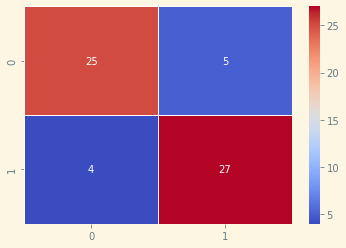

In [50]:
#### Confusion Matrix
sns.heatmap(confusion_matrix(y_test, yPrediction), annot=True, linewidths=1, cmap="coolwarm")

tn, fp, fn, tp = confusion_matrix(y_test, decisionTree.predict(x_test)).ravel()

# Confusion Matrix Recall
# TP / (TP+FN)
recall = tp / (tp+fn)
print(f"Confusion Matrix Recall: {(recall)*100:0.2f}%")

# Confusion Matrix Precision
# TP / (TP+FP)
precision = tp / (tp+fn)
print(f"Confusion Matrix Precision: {(precision)*100:0.2f}%")

# Confusion Matrix Accuracy
# (TP+TN) / (TP+TN+FP+FN)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(f"Confusion Matrix Accuracy: {(accuracy)*100:0.2f}%")

### Machine Learning Results

All result of 6 ML Model tests

In [51]:
mlScores = pd.DataFrame({
    'model': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Random Forest', 'Decision Tree'],
    'accuracy': [
        logisticRegressionScore * 100,
        knnScore * 100,
        supportVectorAccuracy * 100,
        naiveBayesAccuracy * 100,
        randomForestAccuracy * 100,
        decisionTreeAccuracy * 100
    ]
})

mlScores

,model,accuracy
0,Logistic Regression,88.524590
1,K-Nearest Neighbors,85.245902
2,Support Vector Machine,91.803279
3,Naive Bayes,86.885246
4,Random Forest,90.163934
5,Decision Tree,85.245902


In [52]:
# Sorted Models Score
mlScores.sort_values(by='accuracy', ascending=False, inplace=True)

mlScores

,model,accuracy
2,Support Vector Machine,91.803279
4,Random Forest,90.163934
0,Logistic Regression,88.524590
3,Naive Bayes,86.885246
1,K-Nearest Neighbors,85.245902
5,Decision Tree,85.245902


Text(0.5, 1.0, 'Machine Learning Score')

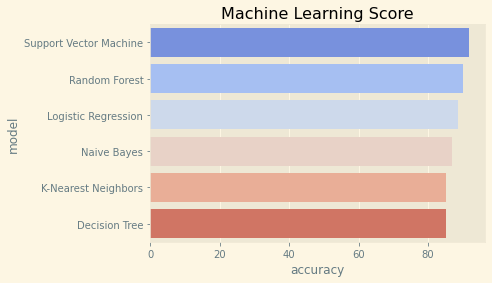

In [53]:
sns.barplot(
    x=mlScores['accuracy'],
    y=mlScores['model'],
    palette='coolwarm'
).set_title('Machine Learning Score')

From the result of our test, we can conclude that Support Vector Machine, Random Forest, and Logistic Regression has the highest value from all machine learning models.
For heart disease, I chose Logistic Regression, as Naive Bayes tends to assumes that data are conditionally independent. Real data sets are never perfectly independent, especially when detecting heart disease.